# 1. Exploratory data analysis
**Project description and objective:**

Here we have user data from an e-commerce site. The data has information on users' characteristics such as their country, marketing channel, age, the number of pages they visted during the session, and whether they are returning users. We also have infomation on their convesions. 

The goal of this project is to come up with recommendations for the product and the marketing team to improve user conversion rate. 

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_theme()

## 1.1. Understanding the data
### 1.1.1. Basic information 
The conversion_rate data includes the following variables: 
1. country: user country based on the IP address
2. age: user age (Self-reported at sign-up step) 
3. new_user: whether the user created the account during this session or had already an account and simply came back to the site
4. source: marketing channel source
5. total_pages_visited: number of total pages visited during the session. This can be seen as a proxy for time spent on site and engagement
6. converted: this is our label. 1 means they converted within the session, 0 means they left without buying anything.

Among the variables, country and source are categorical data and age, new_user, total_pages_visted, and converted are numerical data. 

In this seciton, we are trying to have a basic understanding of the user profiles. 

In [2]:
df = pd.read_csv('conversion_project.csv')
print(f'The shape of the data is {df.shape}.\n')
df.head()

The shape of the data is (316200, 6).



,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


From the data information below, we know that
- the data description shows the maximum age is 123, which is likely to be fake data
- the majority of the users are new users with the percentage being 68%
- the conversion rate is 3% 

In [3]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


Here we see that all the users in the database come from four different countries and use three different marketing channel sources.

In [4]:
df.nunique(axis=0)

country                 4
age                    60
new_user                2
source                  3
total_pages_visited    29
converted               2
dtype: int64

### 1.1.2. Clearning the dataset

We first check if there is any missing values in the data.

In [4]:
df.isna().any()

country                False
age                    False
new_user               False
source                 False
total_pages_visited    False
converted              False
dtype: bool

We want to detect outliers in the data on user age and total number of pages visted. From the boxplots and histograms, we observe that there are two outliers in age that is over 100, and the data distributions for age and total_pages_visted are both positively skewed, with total_pages_visted distribution having a long tail on the right. 
 
We will remove the two outliers in age (age=111,123) which are very likely to be fake data. 

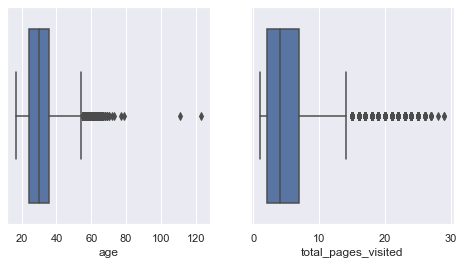

In [39]:
fig, axes = plt.subplots(1,2,figsize=(8,4))
sns.boxplot(data=df,x='age',ax=axes[0])
sns.boxplot(data=df,x='total_pages_visited',ax=axes[1])
plt.show()


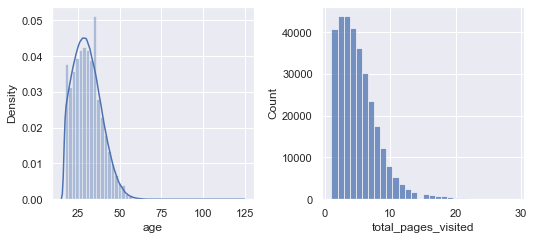

In [55]:
fig, axes = plt.subplots(1,2,figsize=(8,4))
plt.tight_layout(pad=3)
sns.distplot(df['age'],ax=axes[0])
sns.histplot(df['total_pages_visited'],bins=30,ax=axes[1])
plt.show()

In [5]:
df_clean = df.copy()
df_clean[df_clean['age']>100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


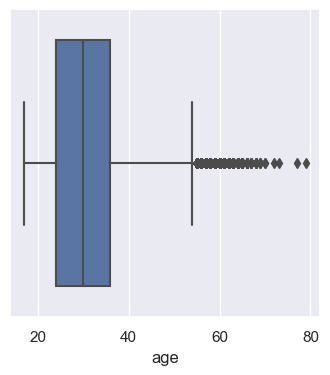

In [6]:
df_clean = df_clean.drop(df_clean[df_clean['age']>100].index)

fig, ax = plt.subplots(figsize=(4,4))
sns.boxplot(data=df_clean,x='age',ax=ax)
plt.show()

### 1.1.3. Understanding the user profile

In [120]:
df_clean.describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


**Age and total_pages_visited:** As we discussed before, the data distributions for age and total_pages_visted are both positively skewed, with total_pages_visted distribution having a long tail on the right. 

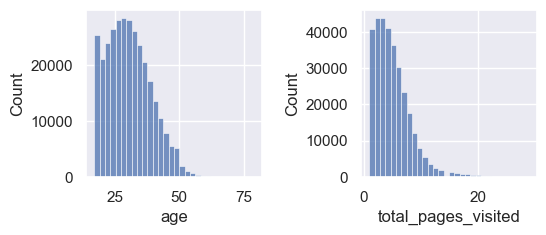

In [68]:
fig, axes = plt.subplots(1,2,figsize=(6,3))
plt.tight_layout(pad=3)
sns.histplot(df_clean['age'],bins=30,ax=axes[0])
sns.histplot(df_clean['total_pages_visited'],bins=30,ax=axes[1])
plt.show()

**New_user, country, and source**:
- the majority (68% ) of the users didn't have an account before
- more than half of the users come from the US while only 4% of them come from Germany 
- around half of the users come from the the marketing channel source Seo 



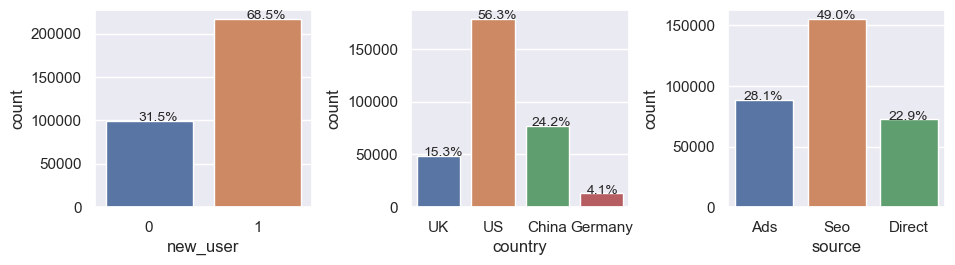

In [119]:
def without_hue(ax, feature,x_shift):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - x_shift
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 10)

fig, axes = plt.subplots(1,3,figsize=(10,3.3))
plt.tight_layout(pad=3)
sns.countplot(x=df_clean['new_user'],ax=axes[0])
axes[0].set_ylabel('count')
without_hue(axes[0], df_clean['country'],0.1)

sns.countplot(x=df_clean['country'],ax=axes[1])
axes[0].set_ylabel('count')
without_hue(axes[1], df_clean['country'],0.28)

sns.countplot(x=df_clean['source'],ax=axes[2])
axes[0].set_ylabel('count')
without_hue(axes[2], df_clean['country'],0.28)
plt.show()

**Conversion rate:** The percentage of the converted users is only around 3 percent, which means this data is highly imbalanced. We will not use accuracy/AUC as the metric for our training model and will use the macro F1 score instead.

The percentage of converted users is 3.2251943402551566%. 



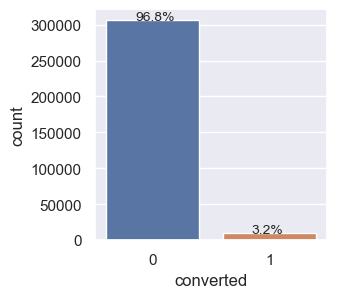

In [125]:
print(f"The percentage of converted users is {100*len(df_clean[df_clean['converted']==1])/(len(df_clean))}%. \n")

fig, ax = plt.subplots(figsize=(3,3))
sns.countplot(ax=ax,x=df['converted'])
without_hue(ax, df_clean['converted'],0.15)
plt.show()

### 1.1.4. Summary

**User profile:**
- Most of the users are under 50 years old and have visited fewer than 15 pages. 
- The new users to existing users ratio is 7 to 3.
- Half of the users are from the US while on 4 percent are from Germany
- Half of the users know the products from the source 'Seo.'
- 3% of the user converted - the data is highly imbalanced.

## 1.3. Analyze relationship between variables 

### 1.3.1. Numerical data
Here we compute the correlations matrix for all the numerical features, which allows us to answer the following qustions.  


**What is the association between conversion rate and the user profile?**
- age is negatively correlated with the conversion rate, meaning younger users are morely likely to convert
- total number of pages visited is postiively associated with the conversion rate with the highest correlation (0.53) among other numerical features. This implies users who have visited more pages are more likely to convert 
- new users is negatively correlated with the conversion rate. Existing/returning users are more likely to convert 

**How are the features correlated with each other?**
- age is negatively correlated with total number of pages visited with a relatively week correlation (0.046). 

In [10]:
corr = df_clean[['age','total_pages_visited','new_user','converted']].corr()
print(corr)

                          age  total_pages_visited  new_user  converted
age                  1.000000            -0.046093  0.012445  -0.089199
total_pages_visited -0.046093             1.000000 -0.082522   0.528975
new_user             0.012445            -0.082522  1.000000  -0.152338
converted           -0.089199             0.528975 -0.152338   1.000000


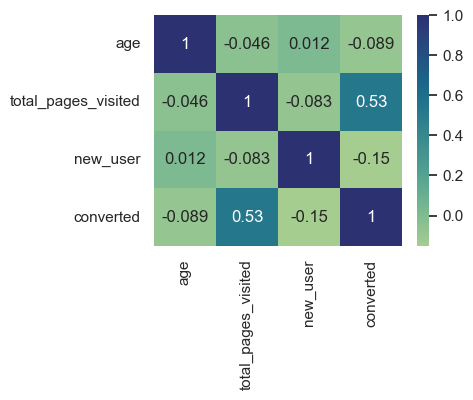

In [29]:
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(corr,annot=True,cmap='crest',ax=ax)
plt.show()

**Age and total_pages_visited:** Here we show the scatterplot between age and total pages visited and we see a negative trend in total pages visited as age increases.

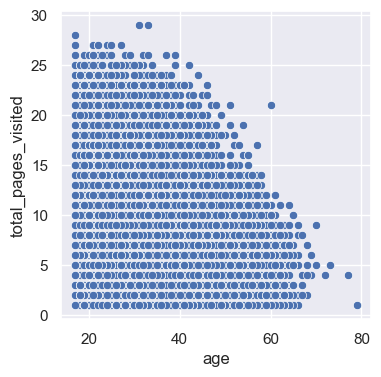

In [31]:
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(data=df_clean,x='age',y='total_pages_visited',ax=ax)
plt.show()

**Age and convervsion rate:** The lineplot shows that a monotonic decreases in conversion rates as user age increases, till around 60 where we observe small peak. The barplot shows the age distributions for users who converted and who didn't. 

The trend we observe is that as user age increases, the conversion rate decreases. The converted users are the younger users while the user who didn't convert are among all ages.

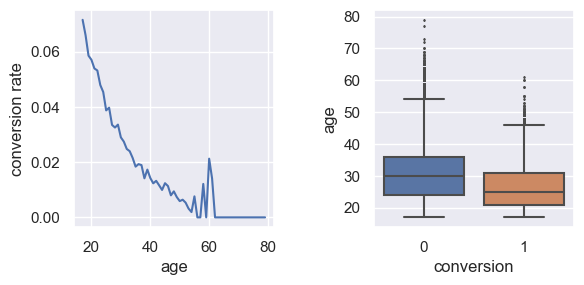

In [51]:
fig, axes = plt.subplots(1,2,figsize=(6.5,3.5))
plt.tight_layout(pad=3)
df_clean.groupby('age')['converted'].mean().plot(ax=axes[0])
axes[0].set_ylabel('conversion rate')
sns.boxplot(data=df_clean,y='age',x='converted',fliersize=1,ax=axes[1])
axes[1].set_xlabel('conversion')
axes[1].set_ylabel('age')
plt.show()
plt.show()

**New_user and conversion rate:** The conversion rate for new users is 1.4% while the conversion rate for existiing users is 7.2%, which is much greater than the former.

In [52]:
df_clean.groupby('new_user')['converted'].mean()

new_user
0    0.071983
1    0.014021
Name: converted, dtype: float64

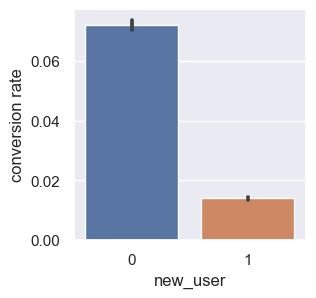

In [53]:
fig, ax = plt.subplots(figsize=(3,3))
sns.barplot(x=df_clean['new_user'],y=df['converted'],ax=ax)
ax.set_ylabel('conversion rate')
plt.show()

### 1.3.2. Categorical data

Among all the countries, China has significantly lower conversion rate compared to other counreis. Germany has the highest conversion rate. 

In [86]:
df_clean.groupby('country')['converted'].mean()

country
China      0.001332
Germany    0.062428
UK         0.052612
US         0.037801
Name: converted, dtype: float64

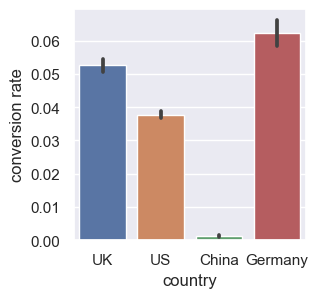

In [70]:
fig, axes = plt.subplots(1,2,figsize=(3,3))
sns.barplot(x=df_clean['country'],y=df['converted'],ax=ax)
ax.set_ylabel('conversion rate')
plt.show()

Here we show the conversion rates for users that come from different sources. There is no significant differences between all the sources. Among the three sources, ads produce the higheset conversion rates. 

In [87]:
df_clean.groupby('source')['converted'].mean()

source
Ads       0.034472
Direct    0.028169
Seo       0.032888
Name: converted, dtype: float64

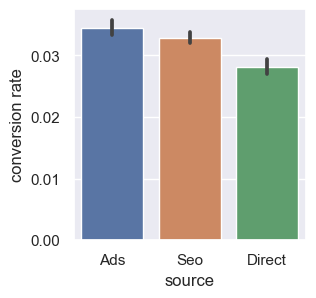

In [60]:
fig, ax = plt.subplots(figsize=(3,3))
sns.barplot(x=df_clean['source'],y=df['converted'],ax=ax)
ax.set_ylabel('conversion rate')
plt.show()

The following table and barplot shows that returning users are more likely to conevrt compared to new users, which is not surprising. 

In [89]:
df_clean.groupby('new_user')['converted'].mean()

new_user
0    0.071983
1    0.014021
Name: converted, dtype: float64

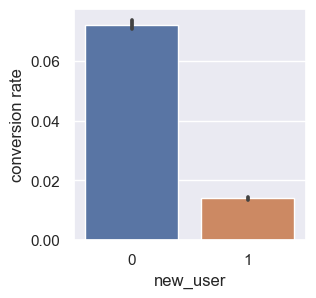

In [88]:
fig, ax = plt.subplots(figsize=(3,3))
sns.barplot(x=df_clean['new_user'],y=df['converted'],ax=ax)
ax.set_ylabel('conversion rate')
plt.show()

### 1.3.3. Summary

1. **What is the association between conversion rate and user profile?**
Age, and being a new user is negatively associated with user conversion, and total number of pages visited is positively associated with the conversion rate. Also, Chinese users have much lower a conversion rate compared to users from UK, US, and Germany. Marketing channel sources don't seem to have an impact on whether users convert.
        
2. **What are some key indicators for a high/low conversion rate?**
Key indicators for a high conversion rate are high number of pages visited, existing users, younger ages. 
Key indicators for a low conversion rate are being from China, low number of pages visited, new users, older ages. 

3. **What would a group of users with a high conversion rate look like and what group could be the best target audience for a marketing campaign?**
Younger users who have already visited a number of pages, have existing accounts, and live in Germany, UK or US.


In [97]:
df_clean.to_csv('conversion_data_clean.csv',index=False)